In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA

import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas import Grouper
from pandas.plotting import lag_plot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from matplotlib import pyplot
#import pmdarima as pm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#import Series

In [3]:
#Quarter 1
dataset_2015_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2015_Q1.csv')
dataset_2016_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2016_Q1.csv')
dataset_2017_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2017_Q1.csv')
dataset_2018_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2018_Q1.csv')

#Quarter 2 
dataset_2015_Q2 = pd.read_csv('Datasets/quarter2/Divvy_Trips_2015_Q2.csv')
dataset_2016_04  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_04.csv')
dataset_2016_05  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_05.csv')
dataset_2016_06  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_06.csv')
dataset_2016_Q2 = pd.concat([dataset_2016_04, dataset_2016_05, dataset_2016_06])
dataset_2017_Q2 = pd.read_csv('Datasets/quarter2/Divvy_Trips_2017_Q2.csv')
dataset_2018_Q2 = pd.read_csv('Datasets/quarter2/Divvy_Trips_2018_Q2.csv')

#Quarter 3 
dataset_2015_07  = pd.read_csv('Datasets/quarter3/Divvy_Trips_2015_07.csv')
dataset_2015_08  = pd.read_csv('Datasets/quarter3/Divvy_Trips_2015_08.csv')
dataset_2015_09  = pd.read_csv('Datasets/quarter3/Divvy_Trips_2015_09.csv')
dataset_2015_Q3 = pd.concat([dataset_2015_07, dataset_2015_08, dataset_2015_09])
dataset_2016_Q3 = pd.read_csv('Datasets/quarter3/Divvy_Trips_2016_Q3.csv')
dataset_2017_Q3 = pd.read_csv('Datasets/quarter3/Divvy_Trips_2017_Q3.csv')
dataset_2018_Q3 = pd.read_csv('Datasets/quarter3/Divvy_Trips_2018_Q3.csv')

#Quarter 4 
dataset_2015_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2015_Q4.csv')
dataset_2016_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2016_Q4.csv')
dataset_2017_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2017_Q4.csv')
dataset_2018_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2018_Q4.csv')

In [4]:
#Quarter 2
dataset_2015_Q2['starttime'] = pd.to_datetime(dataset_2015_Q2['starttime'],infer_datetime_format=True)
dataset_2015_Q2['stoptime']  = pd.to_datetime(dataset_2015_Q2['stoptime'],infer_datetime_format=True)

dataset_2016_Q2['starttime'] = pd.to_datetime(dataset_2016_Q2['starttime'],infer_datetime_format=True)
dataset_2016_Q2['stoptime']  = pd.to_datetime(dataset_2016_Q2['stoptime'],infer_datetime_format=True)

dataset_2017_Q2['starttime'] = pd.to_datetime(dataset_2017_Q2['starttime'],infer_datetime_format=True)
dataset_2017_Q2['stoptime']  = pd.to_datetime(dataset_2017_Q2['stoptime'],infer_datetime_format=True)

dataset_2018_Q2['starttime'] = pd.to_datetime(dataset_2018_Q2['starttime'],infer_datetime_format=True)
dataset_2018_Q2['stoptime']  = pd.to_datetime(dataset_2018_Q2['stoptime'],infer_datetime_format=True)

In [5]:
#Quarter 2 

filtereddata_2015_Q2 = dataset_2015_Q2[(dataset_2015_Q2.from_station_id==35)]
filtereddata_2016_Q2 = dataset_2016_Q2[(dataset_2016_Q2.from_station_id==35)]
filtereddata_2017_Q2 = dataset_2017_Q2[(dataset_2017_Q2.from_station_id==35)]
filtereddata_2018_Q2 = dataset_2018_Q2[(dataset_2018_Q2.from_station_id==35)]

In [6]:
filtereddata_2015_Q2 = filtereddata_2015_Q2[(filtereddata_2015_Q2.starttime.dt.weekday_name!='Saturday') & (filtereddata_2015_Q2.starttime.dt.weekday_name!='Sunday')]
filtereddata_2016_Q2 = filtereddata_2016_Q2[(filtereddata_2016_Q2.starttime.dt.weekday_name!='Saturday') & (filtereddata_2016_Q2.starttime.dt.weekday_name!='Sunday')]
filtereddata_2017_Q2 = filtereddata_2017_Q2[(filtereddata_2017_Q2.starttime.dt.weekday_name!='Saturday') & (filtereddata_2017_Q2.starttime.dt.weekday_name!='Sunday')]
filtereddata_2018_Q2 = filtereddata_2018_Q2[(filtereddata_2018_Q2.starttime.dt.weekday_name!='Saturday') & (filtereddata_2018_Q2.starttime.dt.weekday_name!='Sunday')]

In [7]:
all_year = pd.concat([filtereddata_2015_Q2,filtereddata_2016_Q2,filtereddata_2017_Q2,filtereddata_2018_Q2])
quarter2 = pd.DataFrame(all_year.groupby(all_year.starttime.dt.date).count()['trip_id'])
quarter2_2015 = pd.DataFrame(filtereddata_2015_Q2.groupby(filtereddata_2015_Q2.starttime.dt.date).count()['trip_id'])
quarter2_2016 = pd.DataFrame(filtereddata_2016_Q2.groupby(filtereddata_2016_Q2.starttime.dt.date).count()['trip_id'])
quarter2_2017 = pd.DataFrame(filtereddata_2017_Q2.groupby(filtereddata_2017_Q2.starttime.dt.date).count()['trip_id'])
quarter2_2018 = pd.DataFrame(filtereddata_2018_Q2.groupby(filtereddata_2018_Q2.starttime.dt.date).count()['trip_id'])
quarter2_2015.columns = ['checkout']
quarter2_2016.columns = ['checkout']
quarter2_2017.columns = ['checkout']
quarter2_2018.columns = ['checkout']
quarter2.columns = ['checkout']

C:\Users\Bhavya N\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


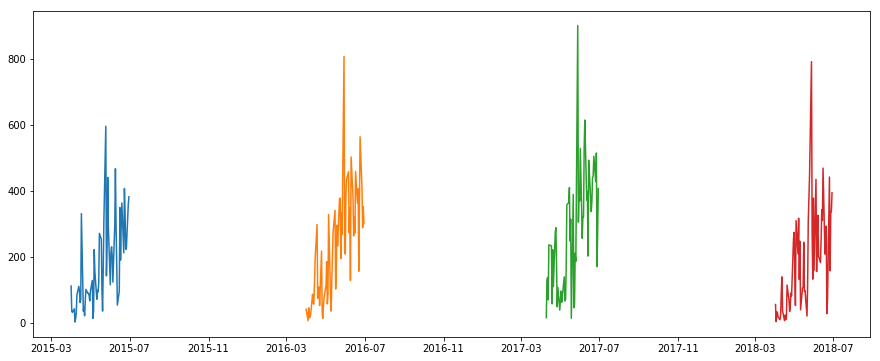

In [8]:
plt.plot(quarter2_2015)
plt.plot(quarter2_2016)
plt.plot(quarter2_2017)
plt.plot(quarter2_2018)

In [9]:
#Test stationarity 
def teststationarity(timeseries): 
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7,center=False).mean() 
    rolstd = timeseries.rolling(window=7,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

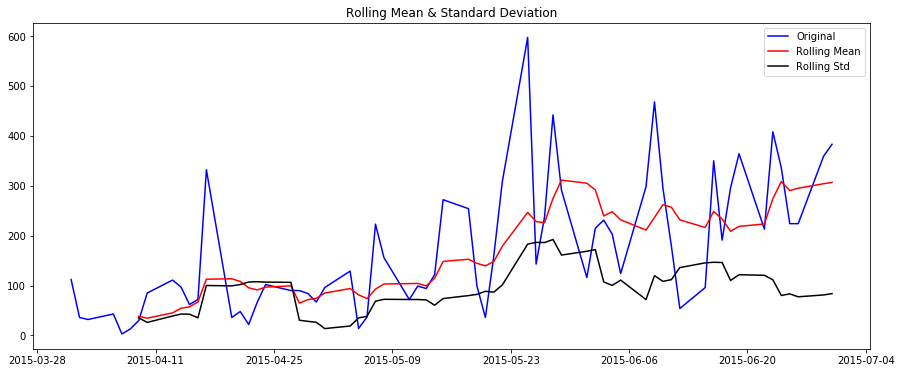

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [10]:
teststationarity(quarter2_2015)

In [11]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

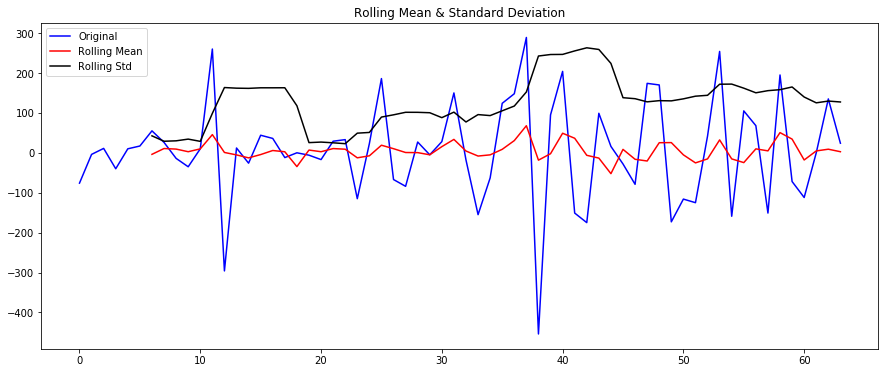

Results of Dickey-Fuller Test:
Test Statistic                    [-7.063066623572444]
p-value                        [5.163596843351273e-10]
#Lags Used                                           3
Number of Observations Used                         60
Critical Value (1%)                           -3.54437
Critical Value (5%)                           -2.91107
Critical Value (10%)                          -2.59319
dtype: object


In [12]:
dd= difference(quarter2_2015.values)
teststationarity(dd)

In [13]:
# Build Model
def modelARIMA(train,test,p,q,d):
    model = sm.tsa.statespace.SARIMAX(train, order=(p,q,d))  
    
    fitted = model.fit(disp=-1)  
    print(fitted.summary())
    # Forecast
    fc, se, conf = fitted.forecast(test.shape[0], alpha=0.3)  # 95% conf
    
    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                     color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    return fc,fc_series

#Auto Arima
def auto_arima(df):
    smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)



    print(smodel.summary())
    return smodel

In [14]:
# Create Training and Test
train = quarter2_2015[:60]
test = quarter2_2015[60:]
fc,fc_series = modelARIMA(train,test,2,1,2)
auto_arima(quarter2_2015)
print("R square:",r2_score(test.values,fc))
print("MEan Absolute error:",mean_absolute_error(test.values,fc))

C:\Users\Bhavya N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\Bhavya N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                           Statespace Model Results                           
Dep. Variable:               checkout   No. Observations:                   60
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -359.051
Date:                Mon, 02 Dec 2019   AIC                            728.103
Time:                        12:01:27   BIC                            738.490
Sample:                    04-01-2015   HQIC                           732.158
                         - 06-23-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0338      0.652      0.052      0.959      -1.245       1.312
ar.L2         -0.2517      0.283     -0.890      0.373      -0.806       0.302
ma.L1         -0.6418      0.661     -0.971      0.3

C:\Users\Bhavya N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


ValueError: too many values to unpack (expected 3)

In [15]:
# Create Training and Test
train = quarter2_2016[:60]
test = quarter2_2016[60:]
fc,fc_series = modelARIMA(train,test,2,1,3)
auto_arima(quarter2_2016)
print("R square:",r2_score(test.values,fc))
print("MEan Absolute error:",mean_absolute_error(test.values,fc))

C:\Users\Bhavya N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\Bhavya N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                           Statespace Model Results                           
Dep. Variable:               checkout   No. Observations:                   60
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -361.757
Date:                Mon, 02 Dec 2019   AIC                            735.514
Time:                        12:01:47   BIC                            747.979
Sample:                    04-01-2016   HQIC                           740.380
                         - 06-23-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6801      0.293      2.318      0.020       0.105       1.255
ar.L2         -0.7177      0.203     -3.541      0.000      -1.115      -0.320
ma.L1         -1.6538      0.350     -4.731      0.0

C:\Users\Bhavya N\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


ValueError: too many values to unpack (expected 3)

In [16]:

quarter2_2015['z_data'] = (quarter2_2015['checkout'] - quarter2_2015.checkout.rolling(window=12).mean()) / quarter2_2015.checkout.rolling(window=12).std()
quarter2_2015['zp_data'] = quarter2_2015['z_data'] - quarter2_2015['z_data'].shift(12)

quarter2_2016['z_data'] = (quarter2_2016['checkout'] - quarter2_2016.checkout.rolling(window=12).mean()) / quarter2_2016.checkout.rolling(window=12).std()
quarter2_2016['zp_data'] = quarter2_2016['z_data'] - quarter2_2016['z_data'].shift(12)

quarter2_2017['z_data'] = (quarter2_2017['checkout'] - quarter2_2017.checkout.rolling(window=12).mean()) / quarter2_2017.checkout.rolling(window=12).std()
quarter2_2017['zp_data'] = quarter2_2017['z_data'] - quarter2_2017['z_data'].shift(12)

quarter2_2018['z_data'] = (quarter2_2018['checkout'] - quarter2_2018.checkout.rolling(window=12).mean()) / quarter2_2018.checkout.rolling(window=12).std()
quarter2_2018['zp_data'] = quarter2_2018['z_data'] - quarter2_2018['z_data'].shift(12)


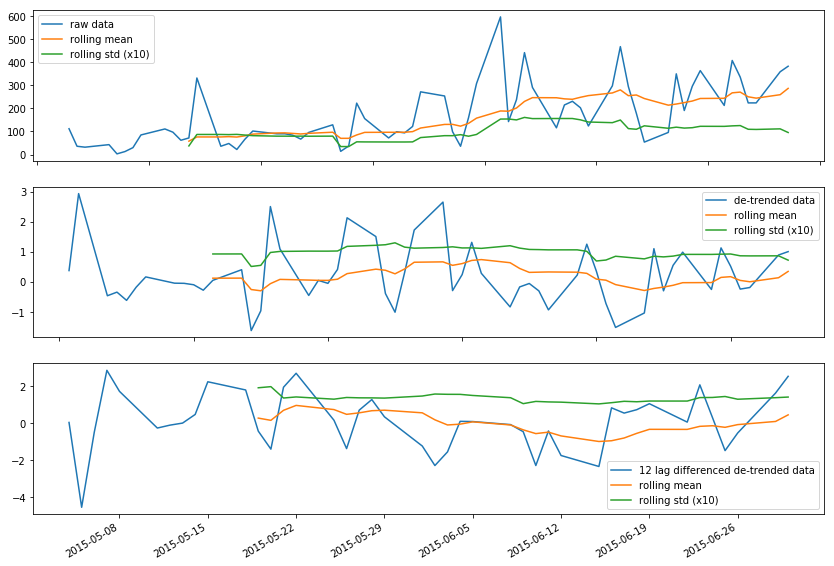

In [17]:

def plot_rolling(df):
    fig, ax = plt.subplots(3,figsize=(12, 9))
    ax[0].plot(df.index, df.checkout, label='raw data')
    ax[0].plot(df.checkout.rolling(window=12).mean(), label="rolling mean");
    ax[0].plot(df.checkout.rolling(window=12).std(), label="rolling std (x10)");
    ax[0].legend()

    ax[1].plot(df.index, df.z_data, label="de-trended data")
    ax[1].plot(df.z_data.rolling(window=12).mean(), label="rolling mean");
    ax[1].plot(df.z_data.rolling(window=12).std(), label="rolling std (x10)");
    ax[1].legend()

    ax[2].plot(df.index, df.zp_data, label="12 lag differenced de-trended data")
    ax[2].plot(df.zp_data.rolling(window=12).mean(), label="rolling mean");
    ax[2].plot(df.zp_data.rolling(window=12).std(), label="rolling std (x10)");
    ax[2].legend()

    plt.tight_layout()
    fig.autofmt_xdate()
plot_rolling(quarter2_2015)

In [19]:
def adfuller_diff(df):
    print(" > Is the data stationary ?")
    dftest = adfuller(df.checkout, autolag='AIC')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

    print("\n > Is the de-trended data stationary ?")
    dftest = adfuller(df.z_data.dropna(), autolag='AIC')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

    print("\n > Is the 12-lag differenced de-trended data stationary ?")
    dftest = adfuller(df.zp_data.dropna(), autolag='AIC')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))


In [20]:
adfuller_diff(quarter2_2015)

 > Is the data stationary ?
Test statistic = -2.338
P-value = 0.160
Critical values :
	1%: -3.540522678829176 - The data is not stationary with 99% confidence
	5%: -2.9094272025108254 - The data is not stationary with 95% confidence
	10%: -2.5923136524453696 - The data is not stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -7.198
P-value = 0.000
Critical values :
	1%: -3.562878534649522 - The data is  stationary with 99% confidence
	5%: -2.918973284023669 - The data is  stationary with 95% confidence
	10%: -2.597393446745562 - The data is  stationary with 90% confidence

 > Is the 12-lag differenced de-trended data stationary ?
Test statistic = -6.464
P-value = 0.000
Critical values :
	1%: -3.6055648906249997 - The data is  stationary with 99% confidence
	5%: -2.937069375 - The data is  stationary with 95% confidence
	10%: -2.606985625 - The data is  stationary with 90% confidence


In [21]:
adfuller_diff(quarter2_2018)

 > Is the data stationary ?
Test statistic = -2.968
P-value = 0.038
Critical values :
	1%: -3.5386953618719676 - The data is not stationary with 99% confidence
	5%: -2.9086446751210775 - The data is  stationary with 95% confidence
	10%: -2.591896782564878 - The data is  stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -5.115
P-value = 0.000
Critical values :
	1%: -3.560242358792829 - The data is  stationary with 99% confidence
	5%: -2.9178502070837 - The data is  stationary with 95% confidence
	10%: -2.5967964150943397 - The data is  stationary with 90% confidence

 > Is the 12-lag differenced de-trended data stationary ?
Test statistic = -3.610
P-value = 0.006
Critical values :
	1%: -3.653519805908203 - The data is not stationary with 99% confidence
	5%: -2.9572185644531253 - The data is  stationary with 95% confidence
	10%: -2.6175881640625 - The data is  stationary with 90% confidence


In [22]:
detrend_Data_2015  = quarter2_2015[['z_data']]
detrend_Data_2015.dropna(inplace=True)

C:\Users\Bhavya N\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
detrend_Data_2015.shape

In [ ]:
# Create Training and Test
train = detrend_Data_2015[:50]
test = detrend_Data_2015[50:]
fc,fc_series = modelARIMA(train,test,5,1,2)
auto_arima(detrend_Data_2015)
print("R square:",r2_score(test.values,fc))
print("MEan Absolute error:",mean_absolute_error(test.values,fc))

In [ ]:
diff_Data_2015  = quarter2_2015[['zp_data']]
diff_Data_2015.dropna(inplace=True)


In [ ]:
# Create Training and Test
train = diff_Data_2015[:36]
test = diff_Data_2015[36:]
fc,fc_series = modelARIMA(train,test,0,1,2)
auto_arima(diff_Data_2015)
print("R square:",r2_score(test.values,fc))
print("MEan Absolute error:",mean_absolute_error(test.values,fc))